<h1>Central Limit Theorem</h1>

The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacementtext annotation indicator, then the distribution of the sample means will be approximately normally distributed. This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually n > 30). If the population is normal, then the theorem holds true even for samples smaller than 30.

=>Analyzing data involves statistical methods like hypothesis testing and constructing confidence intervals. These methods assume that the population is normally distributed. In the case of unknown or non-normal distributions, we treat the sampling distribution as normal according to the central limit theorem <br><br>
=>If we increase the samples drawn from the population, the standard deviation of sample means will decrease. This helps us estimate the population mean much more accurately<br><br>
=>Also, the sample mean can be used to create the range of values known as a confidence interval (that is likely to consist of the population mean<br><br>
=>Political/election polls are prime CLT applications. These polls estimate the percentage of people who support a particular candidate. You might have seen these results on news channels that come with confidence intervals. The central limit theorem helps calculate that<br><br>
=>Confidence interval, an application of CLT, is used to calculate the mean family income for a particular region<br><br>

Source: http://srjcstaff.santarosa.edu

In [1]:
import numpy as np
import seaborn as sns
import statistics as stats

<h2>Let's divide this experiment into four parts </h2>
<br>
=> sampling from a normally distributed population <br>
=> sampling from a skewed population <br>
=> sampling from a bimodal  population <br>
=> sampling from a uniformly distributed population <br>


<h2>Normally distributed population</h2>

In [5]:
xn = np.random.normal(size=10000)

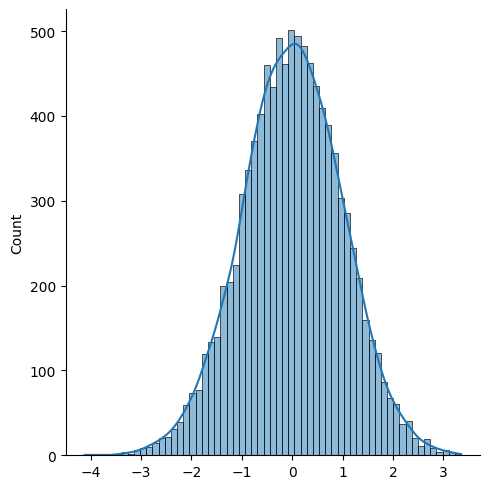

In [6]:
sns.displot(xn, kde=True)

In [8]:
#Now let's check one sampling mean ; replace = False is used so that the numbers are not repeated
xn_sample =  np.random.choice(xn, size=10, replace=False)
xn_sample

array([-0.0414125 , -0.9329178 , -1.12693207,  0.09284389,  0.68364028,
        0.23532213,  1.27784514, -1.61861231,  2.67046079, -0.67199616])

In [11]:
stats.mean(xn_sample)

0.056824138620110626

In [12]:
#We need to have multiple sampling distributions in order to carry out our experiment successfully

def sample_mean_calc(population, sample_size, n_samples):
    sample_mean = []
    for i in range(n_samples):
        sample = np.random.choice(population, sample_size, replace=False)
        sample_mean.append(stats.mean(sample))
        
    return sample_mean

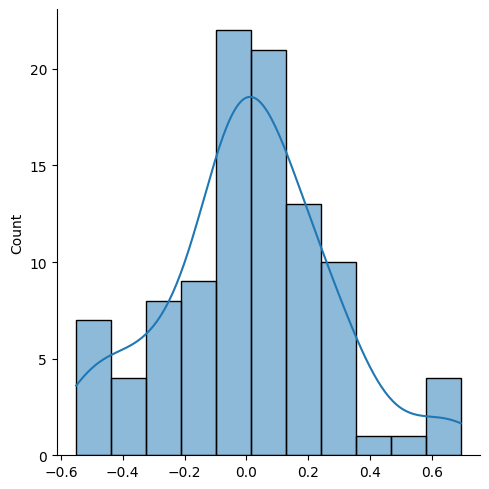

In [16]:
_ = sns.displot(sample_mean_calc(xn, 10, 100), kde=True)

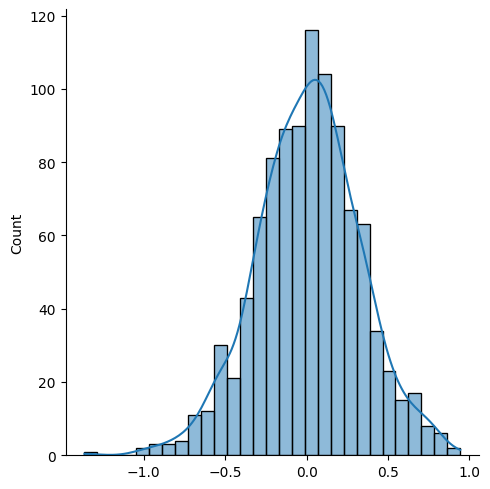

In [17]:
_ = sns.displot(sample_mean_calc(xn, 10, 1000), kde=True)

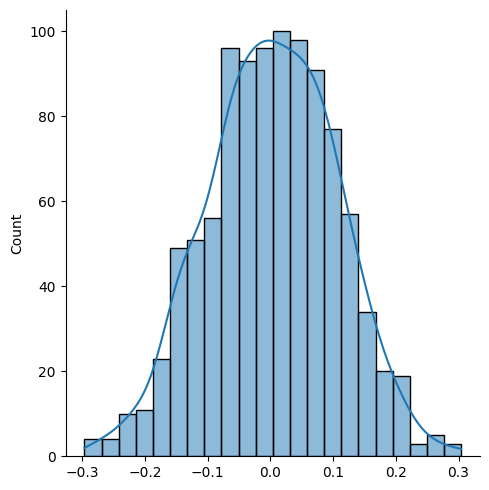

In [18]:
_ = sns.displot(sample_mean_calc(xn, 100, 1000), kde=True)

<h2>Skewed population</h2>

In [20]:
from scipy.stats import skewnorm

In [23]:
x_sk = skewnorm.rvs(12, size=10000)

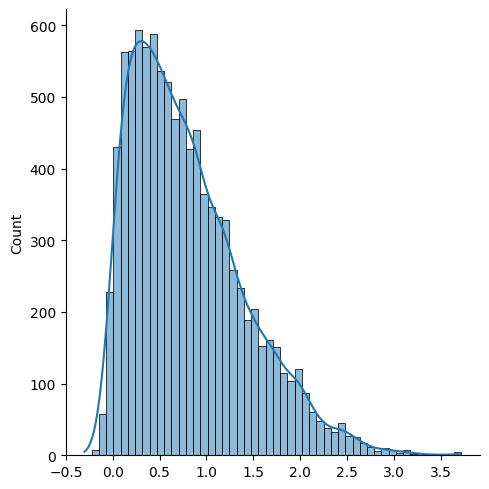

In [24]:
sns.displot(x_sk, kde=True)

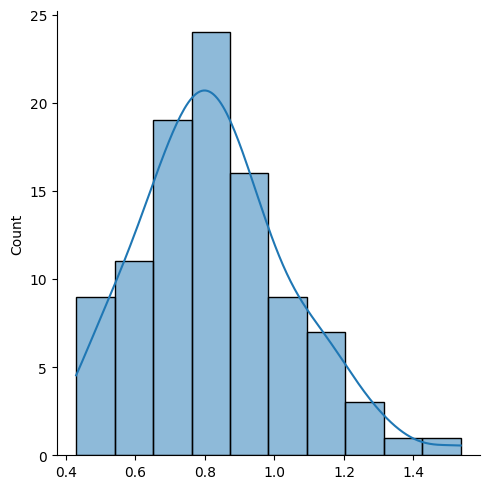

In [25]:
#Using the our mean calc function

_ = sns.displot(sample_mean_calc(x_sk, 10, 100), kde=True)

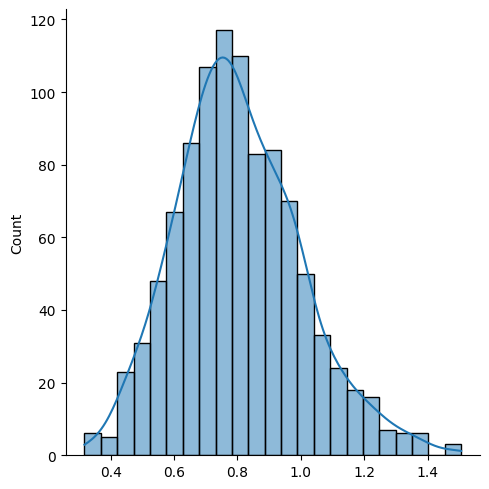

In [26]:
_ = sns.displot(sample_mean_calc(x_sk, 10, 1000), kde=True)

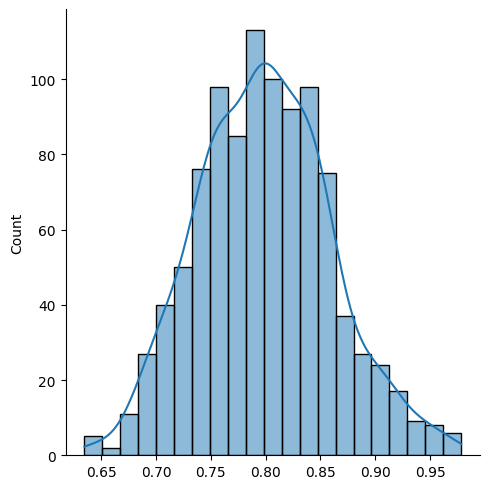

In [27]:
_ = sns.displot(sample_mean_calc(x_sk, 100, 1000), kde=True)

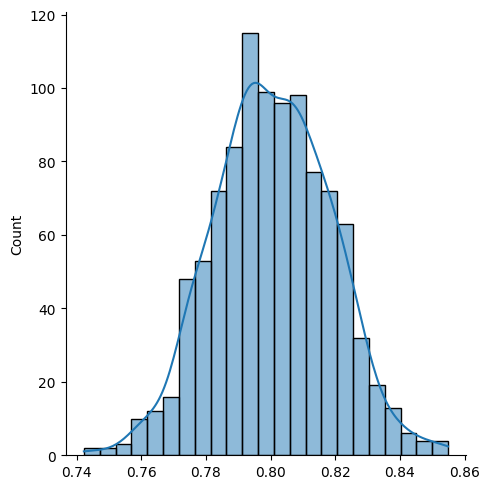

In [28]:
_ = sns.displot(sample_mean_calc(x_sk, 1000, 1000), kde=True)

<h3> As we can see, the more we increase the population size and number of samples, the more closer to normal distribution</h3>

<h2>Bimodal population</h2>

In [30]:
x_bm = np.concatenate((np.random.normal(size=10000), np.random.normal(loc = 4.0, size=10000)))

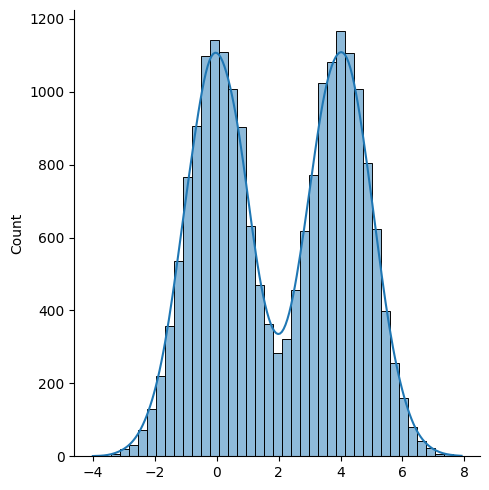

In [31]:
sns.displot(x_bm, kde=True)

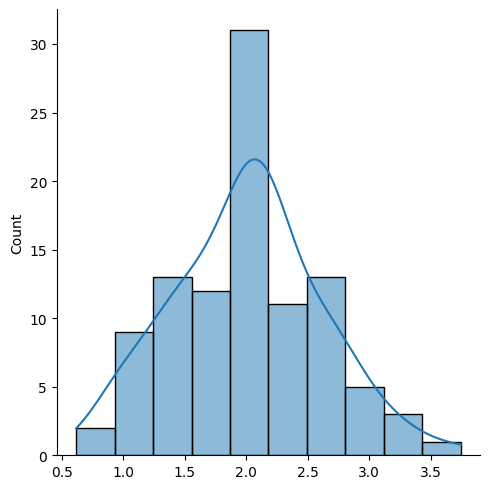

In [32]:
_ = sns.displot(sample_mean_calc(x_bm, 10, 100), kde=True)

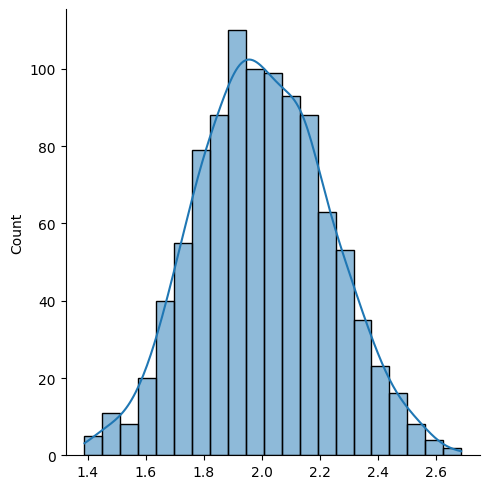

In [35]:
_ = sns.displot(sample_mean_calc(x_bm, 100, 1000), kde=True)

<h2>Uniformly distributed population</h2>

In [37]:
x_u = np.random.uniform(size=10000)

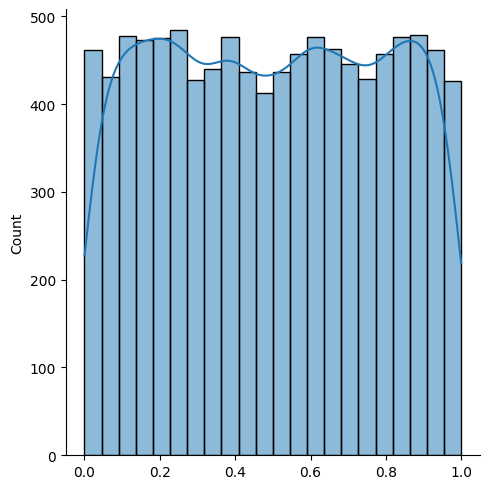

In [38]:
sns.displot(x_u, kde=True)

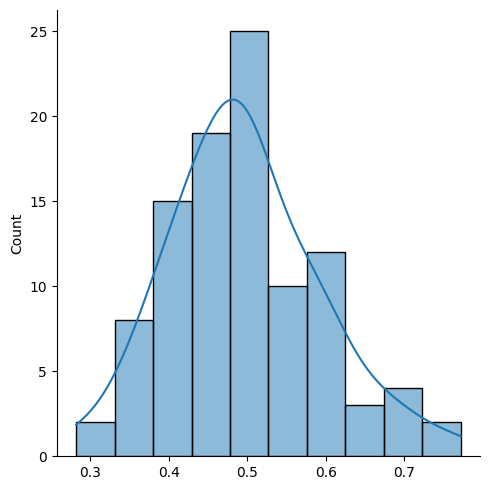

In [39]:
_ = sns.displot(sample_mean_calc(x_u, 10, 100), kde=True)

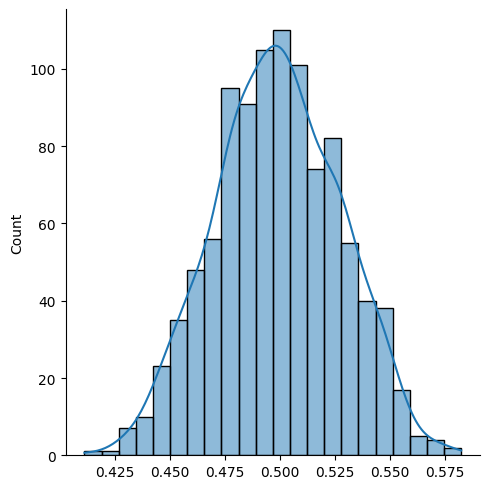

In [41]:
_ = sns.displot(sample_mean_calc(x_u, 100, 1000), kde=True)

<h3> As we saw in all the 4 cases, the sampling distribution of the sample mean was nearing normal distribution as we increase the saple size and number of samples</h3>

<h4>Uses:</h4>
One of the statististical tests is the "t-test" which allows us to infer whether two samples come from different populations (say, an experimental group and a control group).With this central limit theorem, we can test even if we have no idea what the underlying distribution of the population is, which is most of the time.